# Visualizing how the data set is split

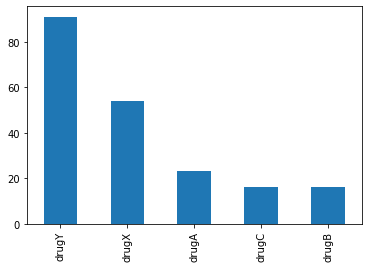

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


dataset = pd.read_csv("./drug200.csv")
dataset['Drug'].value_counts().plot(kind='bar')
plt.savefig("drugset.pdf")

# Sanitizing the data such that both ordinal and categorical features are converted to numerical

### The female column is dropped to prevent co-linearity (male explains male/female already)

In [3]:
#sanitizing the ordinal and categorical data into numerical, drop column female to prevent co-linearity

drugsData = pd.DataFrame(dataset)

ordinalMap = {
    "HIGH":3,
    "NORMAL":2,
    "LOW":1
}

#mapping ordinal values to numerical
drugsData['BP'] = drugsData['BP'].map(ordinalMap)
drugsData['Cholesterol'] = drugsData['Cholesterol'].map(ordinalMap)

#categorical to numerical through 'get_dummies' method
dataset_processed = pd.get_dummies(drugsData, columns=['Sex'])

dataset_final = dataset_processed.drop(['Sex_F'], axis ='columns')
print(dataset_final)

     Age  BP  Cholesterol  Na_to_K   Drug  Sex_M
0     23   3            3   25.355  drugY      0
1     47   1            3   13.093  drugC      1
2     47   1            3   10.114  drugC      1
3     28   2            3    7.798  drugX      0
4     61   1            3   18.043  drugY      0
..   ...  ..          ...      ...    ...    ...
195   56   1            3   11.567  drugC      0
196   16   1            3   12.006  drugC      1
197   52   2            3    9.894  drugX      1
198   23   2            2   14.020  drugX      1
199   40   1            2   11.349  drugX      0

[200 rows x 6 columns]


# Splitting the data into a training and set (80/20)

In [4]:
#split data into train and test set

from sklearn.model_selection import train_test_split

X = dataset_final.drop(['Drug'], axis = 'columns')
Y = dataset_final['Drug']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Initializing all classification models and training them (6 models)

In [5]:
#Model 1: Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X_train, Y_train)

GaussianNB()

In [6]:
#Model 2: Base Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [7]:
#Model 3: Top Decision Tree (with parameters)

from sklearn.model_selection import GridSearchCV

hyper_params1 = {
    'criterion':['gini','entropy'],
    'max_depth': [3,4],
    'min_samples_split': [2,3,4]}

clf_TDT = GridSearchCV(DecisionTreeClassifier(), hyper_params1, cv=5)
clf_TDT.fit(X_train, Y_train)
clf_TDT.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [8]:
#Model 4: Perceptron

from sklearn.linear_model import Perceptron

clf_P = Perceptron()
clf_P.fit(X_train, Y_train)

Perceptron()

In [9]:
#Model 5: Base Multi-Layered Perceptron

from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier()
clf_MLP.fit(X_train, Y_train)

C:\Users\wangk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [10]:
#Model 6: Top Multi-Layered Perceptron

hyper_params2 = {
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}

clf_TMLP = GridSearchCV(MLPClassifier(), hyper_params2, n_jobs=10, cv=3)
clf_TMLP.fit(X_train, Y_train)
clf_TMLP.best_estimator_

C:\Users\wangk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(30, 50))

# Analysis & output of all required test statistics, averages, standard deviations

In [11]:
#Analysis
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statistics

target_names = ['Age', 'BP', 'Cholesterol', 'Na_to_k', 'Sex']

#confusion matrices and test statistics
with open('./drug-performance.txt', 'w+') as f:
    f.write('\n\n(a) The model is: Naive Bayes Classifier')
    f.write('\n(b) The confusion matrix is:')
    f.write('\n'+ np.array2string(confusion_matrix(Y_test, clf_NB.predict(X_test))))
    f.write('\n(c) & (d) The test statistics are:')
    f.write(classification_report(Y_test, clf_NB.predict(X_test)))

    f.write('\n\n(a) The model is: Base Decision Tree')
    f.write('\n(b) The confusion matrix is:')
    f.write('\n'+ np.array2string(confusion_matrix(Y_test, clf_DT.predict(X_test))))
    f.write('\n(c) & (d) The test statistics are:')
    f.write(classification_report(Y_test, clf_DT.predict(X_test)))

    f.write('\n\n(a) The model is: Top Decision Tree and the paramters changed are '+str(clf_TDT.best_estimator_))
    f.write('\n(b) The confusion matrix is:')
    f.write('\n'+ np.array2string(confusion_matrix(Y_test, clf_TDT.predict(X_test))))
    f.write('\n(c) & (d) The test statistics are:')
    f.write(classification_report(Y_test, clf_TDT.predict(X_test)))

    f.write('\n\n(a) The model is: Perceptron')
    f.write('\n(b) The confusion matrix is:')
    f.write('\n'+ np.array2string(confusion_matrix(Y_test, clf_P.predict(X_test))))
    f.write('\n(c) & (d) The test statistics are:')
    f.write(classification_report(Y_test, clf_P.predict(X_test)))

    f.write('\n\n(a) The model is: Base MLP')
    f.write('\n(b) The confusion matrix is:')
    f.write('\n'+ np.array2string(confusion_matrix(Y_test, clf_MLP.predict(X_test))))
    f.write('\n(c) & (d) The test statistics are:')
    f.write(classification_report(Y_test, clf_MLP.predict(X_test)))

    f.write('\n\n(a) The model is: Top MLP and the paramters changed are '+str(clf_TMLP.best_estimator_))
    f.write('\n(b) The confusion matrix is:')
    f.write('\n'+ np.array2string(confusion_matrix(Y_test, clf_TMLP.predict(X_test))))
    f.write('\n(c) & (d) The test statistics are:')
    f.write(classification_report(Y_test, clf_TMLP.predict(X_test)))

    f.write('\n\n----------------------------------------------------TRIAL RUNS----------------------------------------------------')

    num_iterations = 10

    #declare the variables to hold the sum for the average and the list for the SD calculations
    sum_accuracy_NB = 0.0;  sumM_f1_NB = 0.0; sumW_f1_NB = 0.0
    sum_accuracy_DT = 0.0;  sumM_f1_DT = 0.0; sumW_f1_DT = 0.0
    sum_accuracy_TDT = 0.0;  sumM_f1_TDT = 0.0; sumW_f1_TDT = 0.0
    sum_accuracy_P = 0.0;  sumM_f1_P = 0.0; sumW_f1_P = 0.0
    sum_accuracy_MLP = 0.0;  sumM_f1_MLP = 0.0; sumW_f1_MLP = 0.0
    sum_accuracy_TMLP = 0.0;  sumM_f1_TMLP = 0.0; sumW_f1_TMLP = 0.0

    list_accuracy_NB = []; list_mf1_NB = []; list_wf1_NB =[]
    list_accuracy_DT = []; list_mf1_DT = []; list_wf1_DT =[]
    list_accuracy_TDT = []; list_mf1_TDT = []; list_wf1_TDT =[]
    list_accuracy_P = []; list_mf1_P = []; list_wf1_P =[]
    list_accuracy_MLP = []; list_mf1_MLP = []; list_wf1_MLP =[]
    list_accuracy_TMLP = []; list_mf1_TMLP = []; list_wf1_TMLP =[]

    #we iterate through the experiment 10 times, recording test statistics in a list to do average/SD calculations, we also display the classification report for each trial
    for i in range(num_iterations):

      clf_NB.fit(X_train, Y_train)
      clf_DT.fit(X_train, Y_train)
      clf_TDT.fit(X_train, Y_train)
      clf_P.fit(X_train, Y_train)
      clf_MLP.fit(X_train, Y_train)
      clf_TMLP.fit(X_train, Y_train)

      sum_accuracy_NB += float(accuracy_score(Y_test, clf_NB.predict(X_test)))
      sumM_f1_NB += float(f1_score(Y_test, clf_NB.predict(X_test), average = 'macro'))
      sumW_f1_NB += float(f1_score(Y_test, clf_NB.predict(X_test), average = 'weighted'))
      list_accuracy_NB.append(accuracy_score(Y_test, clf_NB.predict(X_test)))
      list_mf1_NB.append(f1_score(Y_test, clf_NB.predict(X_test), average = 'macro'))
      list_wf1_NB.append(f1_score(Y_test, clf_NB.predict(X_test), average = 'weighted'))

      sum_accuracy_DT += float(accuracy_score(Y_test, clf_DT.predict(X_test)))
      sumM_f1_DT += float(f1_score(Y_test, clf_DT.predict(X_test), average = 'macro'))
      sumW_f1_DT += float(f1_score(Y_test, clf_DT.predict(X_test), average = 'weighted'))
      list_accuracy_DT.append(accuracy_score(Y_test, clf_DT.predict(X_test)))
      list_mf1_DT.append(f1_score(Y_test, clf_DT.predict(X_test), average = 'macro'))
      list_wf1_DT.append(f1_score(Y_test, clf_DT.predict(X_test), average = 'weighted'))

      sum_accuracy_TDT += float(accuracy_score(Y_test, clf_TDT.predict(X_test)))
      sumM_f1_TDT += float(f1_score(Y_test, clf_TDT.predict(X_test), average = 'macro'))
      sumW_f1_TDT += float(f1_score(Y_test, clf_TDT.predict(X_test), average = 'weighted'))
      list_accuracy_TDT.append(accuracy_score(Y_test, clf_TDT.predict(X_test)))
      list_mf1_TDT.append(f1_score(Y_test, clf_TDT.predict(X_test), average = 'macro'))
      list_wf1_TDT.append(f1_score(Y_test, clf_TDT.predict(X_test), average = 'weighted'))

      sum_accuracy_P += float(accuracy_score(Y_test, clf_P.predict(X_test)))
      sumM_f1_P += float(f1_score(Y_test, clf_P.predict(X_test), average = 'macro'))
      sumW_f1_P += float(f1_score(Y_test, clf_P.predict(X_test), average = 'weighted'))
      list_accuracy_P.append(accuracy_score(Y_test, clf_P.predict(X_test)))
      list_mf1_P.append(f1_score(Y_test, clf_P.predict(X_test), average = 'macro'))
      list_wf1_P.append(f1_score(Y_test, clf_P.predict(X_test), average = 'weighted'))

      sum_accuracy_MLP += float(accuracy_score(Y_test, clf_MLP.predict(X_test)))
      sumM_f1_MLP += float(f1_score(Y_test, clf_MLP.predict(X_test), average = 'macro'))
      sumW_f1_MLP += float(f1_score(Y_test, clf_MLP.predict(X_test), average = 'weighted'))
      list_accuracy_MLP.append(accuracy_score(Y_test, clf_MLP.predict(X_test)))
      list_mf1_MLP.append(f1_score(Y_test, clf_MLP.predict(X_test), average = 'macro'))
      list_wf1_MLP.append(f1_score(Y_test, clf_MLP.predict(X_test), average = 'weighted'))

      sum_accuracy_TMLP += float(accuracy_score(Y_test, clf_TMLP.predict(X_test)))
      sumM_f1_TMLP += float(f1_score(Y_test, clf_TMLP.predict(X_test), average = 'macro'))
      sumW_f1_TMLP += float(f1_score(Y_test, clf_TMLP.predict(X_test), average = 'weighted'))
      list_accuracy_TMLP.append(accuracy_score(Y_test, clf_TMLP.predict(X_test)))
      list_mf1_TMLP.append(f1_score(Y_test, clf_TMLP.predict(X_test), average = 'macro'))
      list_wf1_TMLP.append(f1_score(Y_test, clf_TMLP.predict(X_test), average = 'weighted'))

      f.write('\n>>>>>trial #' + str(i + 1))
      f.write('\n\nNaive Bayes')
      f.write(classification_report(Y_test, clf_NB.predict(X_test)))
      f.write('\nDecision Tree')
      f.write(classification_report(Y_test, clf_DT.predict(X_test)))
      f.write('\nTop Decision Tree')
      f.write(classification_report(Y_test, clf_TDT.predict(X_test)))
      f.write('\nPerceptron')
      f.write(classification_report(Y_test, clf_P.predict(X_test)))
      f.write('\nMLP')
      f.write(classification_report(Y_test, clf_MLP.predict(X_test)))
      f.write('\nTop MLP')
      f.write(classification_report(Y_test, clf_TMLP.predict(X_test)))

    #write the output for the averages and SD to the file
    f.write('\n\n----------------------------------------------------NAIVE BAYES----------------------------------------------------')
    f.write('\nThe average accuracy is: '+ str(sum_accuracy_NB / float(num_iterations)))
    f.write('\nThe average macro F1 is: '+ str(sumM_f1_NB / float(num_iterations)))
    f.write('\nThe average weighted F1 is: '+ str(sumW_f1_NB / float(num_iterations)))
    f.write('\nThe SD accuracy is: '+ str(statistics.stdev(list_accuracy_NB)))
    f.write('\nThe SD macro F1 is: '+ str(statistics.stdev(list_mf1_NB)))
    f.write('\nThe SD weighted F1 is: '+ str(statistics.stdev(list_wf1_NB)))

    f.write('\n\n----------------------------------------------------BASE DECISION TREE----------------------------------------------------')
    f.write('\nThe average accuracy is: '+ str(sum_accuracy_DT / float(num_iterations)))
    f.write('\nThe average macro F1 is: '+ str(sumM_f1_DT / float(num_iterations)))
    f.write('\nThe average weighted F1 is: '+ str(sumW_f1_DT / float(num_iterations)))
    f.write('\nThe SD accuracy is: '+ str(statistics.stdev(list_accuracy_DT)))
    f.write('\nThe SD macro F1 is: '+ str(statistics.stdev(list_mf1_DT)))
    f.write('\nThe SD weighted F1 is: '+ str(statistics.stdev(list_wf1_DT)))

    f.write('\n\n----------------------------------------------------TOP DECISION TREE----------------------------------------------------')
    f.write('\nThe average accuracy is: '+ str(sum_accuracy_TDT / float(num_iterations)))
    f.write('\nThe average macro F1 is: '+ str(sumM_f1_TDT / float(num_iterations)))
    f.write('\nThe average weighted F1 is: '+ str(sumW_f1_TDT / float(num_iterations)))
    f.write('\nThe SD accuracy is: '+ str(statistics.stdev(list_accuracy_TDT)))
    f.write('\nThe SD macro F1 is: '+ str(statistics.stdev(list_mf1_TDT)))
    f.write('\nThe SD weighted F1 is: '+ str(statistics.stdev(list_wf1_TDT)))

    f.write('\n\n----------------------------------------------------PERCEPTRON----------------------------------------------------')
    f.write('\nThe average accuracy is: '+ str(sum_accuracy_P / float(num_iterations)))
    f.write('\nThe average macro F1 is: '+ str(sumM_f1_P / float(num_iterations)))
    f.write('\nThe average weighted F1 is: '+ str(sumW_f1_P / float(num_iterations)))
    f.write('\nThe SD accuracy is: '+ str(statistics.stdev(list_accuracy_P)))
    f.write('\nThe SD macro F1 is: '+ str(statistics.stdev(list_mf1_P)))
    f.write('\nThe SD weighted F1 is: '+ str(statistics.stdev(list_wf1_P)))

    f.write('\n\n----------------------------------------------------BASE MLP----------------------------------------------------')
    f.write('\nThe average accuracy is: '+ str(sum_accuracy_MLP / float(num_iterations)))
    f.write('\nThe average macro F1 is: '+ str(sumM_f1_MLP / float(num_iterations)))
    f.write('\nThe average weighted F1 is: '+ str(sumW_f1_MLP / float(num_iterations)))
    f.write('\nThe SD accuracy is: '+ str(statistics.stdev(list_accuracy_MLP)))
    f.write('\nThe SD macro F1 is: '+ str(statistics.stdev(list_mf1_MLP)))
    f.write('\nThe SD weighted F1 is: '+ str(statistics.stdev(list_wf1_MLP)))

    f.write('\n\n----------------------------------------------------TOP MLP----------------------------------------------------')
    f.write('\nThe average accuracy is: '+ str(sum_accuracy_TMLP / float(num_iterations)))
    f.write('\nThe average macro F1 is: '+ str(sumM_f1_TMLP / float(num_iterations)))
    f.write('\nThe average weighted F1 is: '+ str(sumW_f1_TMLP / float(num_iterations)))
    f.write('\nThe SD accuracy is: '+ str(statistics.stdev(list_accuracy_TMLP)))
    f.write('\nThe SD macro F1 is: '+ str(statistics.stdev(list_mf1_TMLP)))
    f.write('\nThe SD weighted F1 is: '+ str(statistics.stdev(list_wf1_TMLP)))
    f.close

FileNotFoundError: [Errno 2] No such file or directory: './task2/drug-performance.txt'